In [136]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import seaborn as sns

In [44]:
import pandas as pd

create fake data mimicking growth curve with defined doubling time of 90 minutes

In [45]:
x_log_times = range(200, 485)
y_log_phase = [0.1*exp(np.log(2)/90*(x-200))+0.1 for x in x_log_times] # assume starting OD is 0.2 with blank value of 0.1

(0, 1.2)

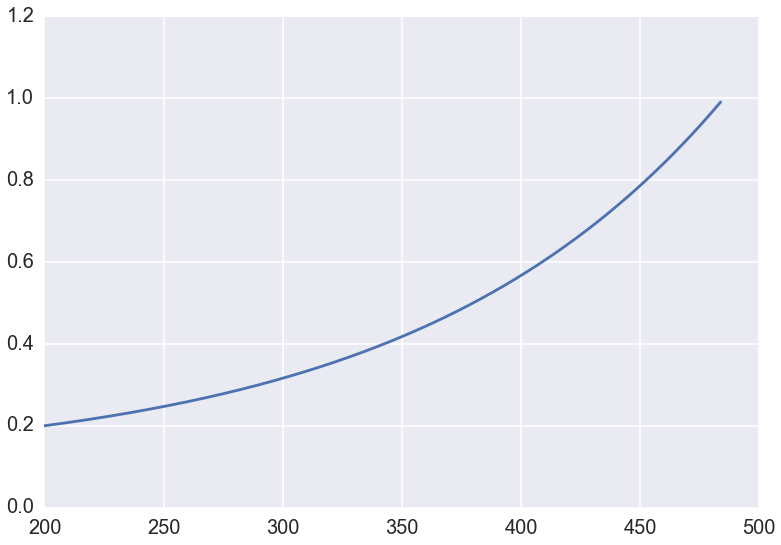

In [46]:
plt.plot(x_log_times, y_log_phase)
plt.ylim(0, 1.2)

In [47]:
x_lag = range(0, 200)
y_lag = [x*0.00005+0.19 for x in x_lag]
x_sat = range(490, 900)
y_sat = [x*0.00005+0.98 for x in x_sat]

(0, 1.2)

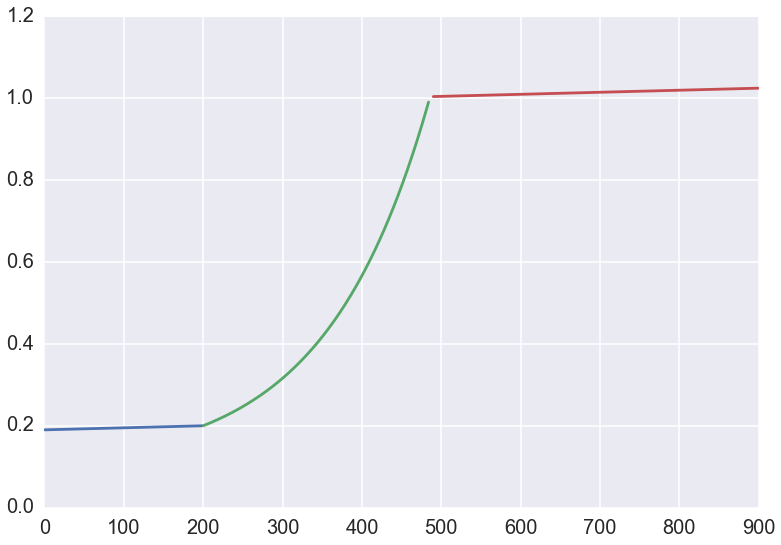

In [48]:
plt.plot(x_lag, y_lag)
plt.plot(x_log_times, y_log_phase)
plt.plot(x_sat, y_sat)
plt.ylim(0, 1.2)

now get data points for every ten minutes

In [49]:
x_points = range(0, 90)
y_points = y_lag[0::10] + y_log_phase[0::10] + y_sat[0::10]
len(x_points), len(y_points)

(90, 90)

(0, 1.2)

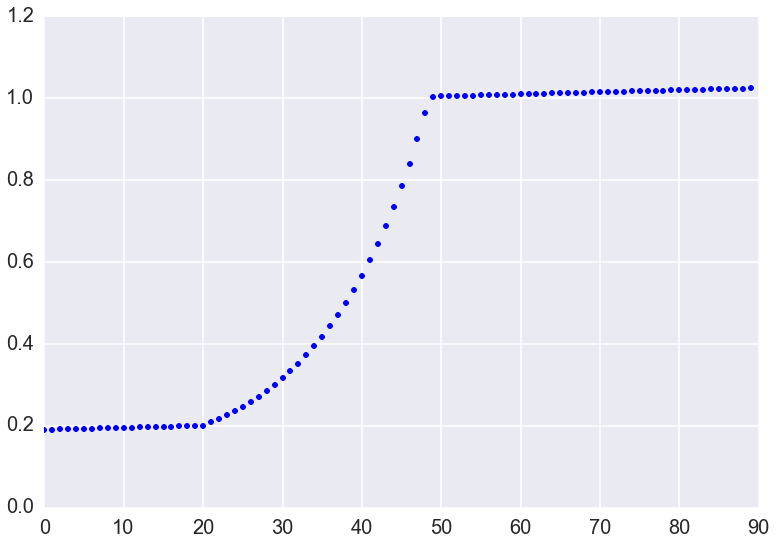

In [50]:
plt.plot(x_points, y_points, 'b.')
plt.ylim(0, 1.2)

now add noise to y data points

In [51]:
def noise(i, s):
    noisy_i = i + np.random.normal(0, s, 1)
    return float(noisy_i)
low_noise_y = [noise(i, 0.005) for i in y_points]
high_noise_y = [noise(i, 0.01) for i in y_points]

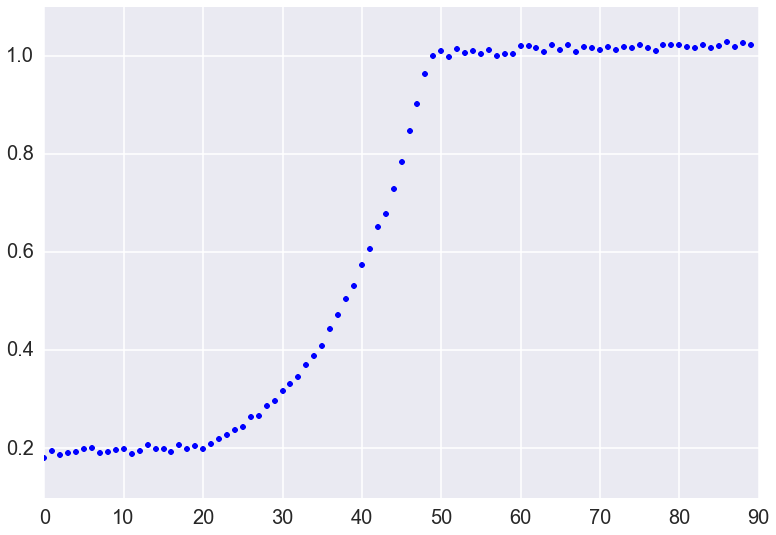

In [52]:
plt.plot(x_points, low_noise_y, 'b.')

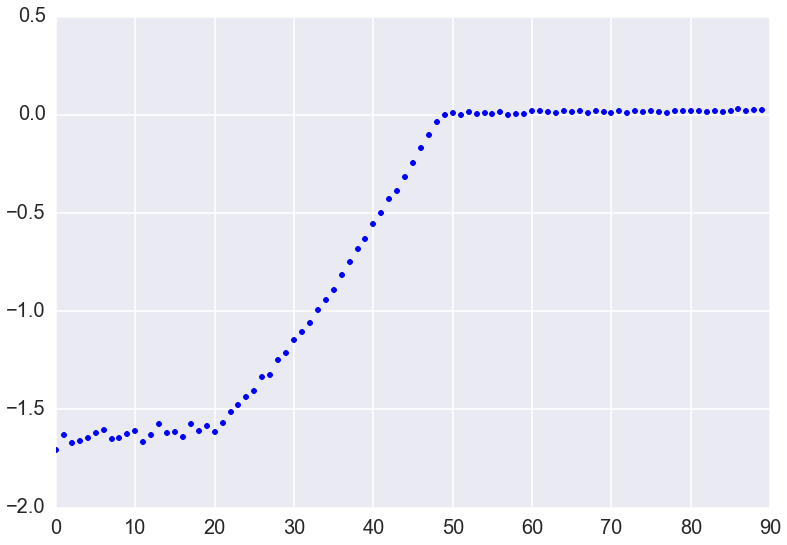

In [53]:
log_low_noise_y = [np.log(i) for i in low_noise_y]
plt.plot(x_points, log_low_noise_y, 'b.')

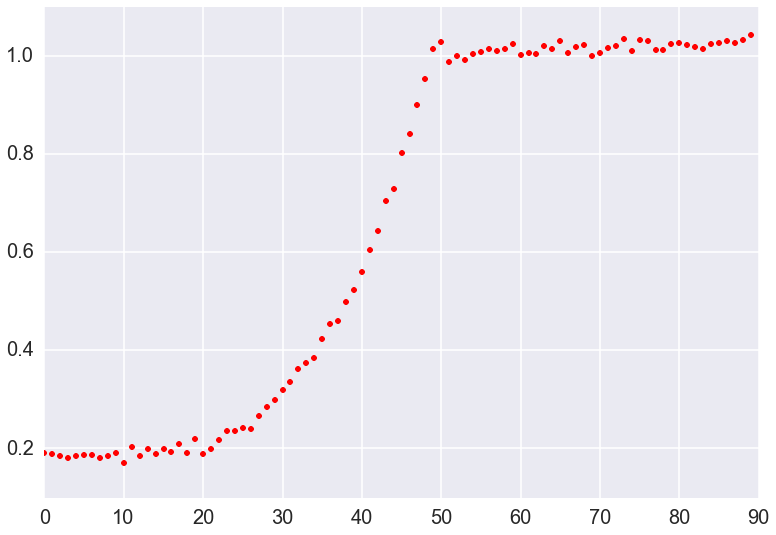

In [54]:
plt.plot(x_points, high_noise_y, 'r.')

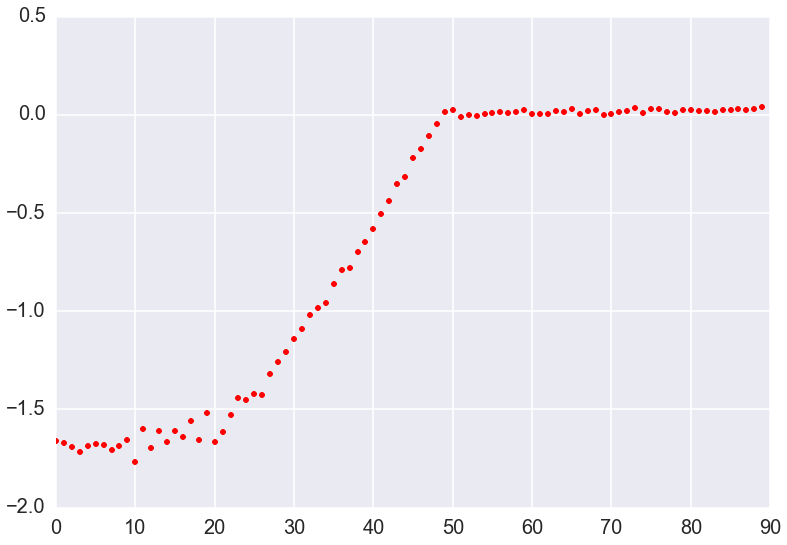

In [55]:
log_high_noise_y = [np.log(i) for i in high_noise_y]
plt.plot(x_points, log_high_noise_y, 'r.')

now make data for lots of samples, half low noise and half high noise, and export to excel sheet

In [23]:
data_dict ={}
for l in ('A','B','C','D','E','F','G','H'):
    for n in range(1, 7):
        well_name = str(l)+str(n)
        y_data = [noise(i, 0.005) for i in y_points]
        data_dict[well_name] = y_data
    for n in range(7, 13):
        well_name = str(l)+str(n)
        y_data = [noise(i, 0.01) for i in y_points]
        data_dict[well_name] = y_data
times = [10*x for x in x_points]
data_dict['Minutes'] = times

In [29]:
import pandas as pd
test_data = pd.DataFrame(data_dict)
cols = test_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_data = test_data[cols]

In [30]:
test_data.to_excel('./test_data.xlsx')

ready to test!

In [7]:
import growth_curve_analysis as od

In [9]:
spline_test = od.analyze_experiment('./test_data.xlsx', method='spline', blank=0.1, out_dir = './')  # s = 0.1

created experiment
input samples
analyzed samples
created output data file


In [10]:
spline_test.results['noise'] = np.where(spline_test.results['column']>6, 'high', 'low')

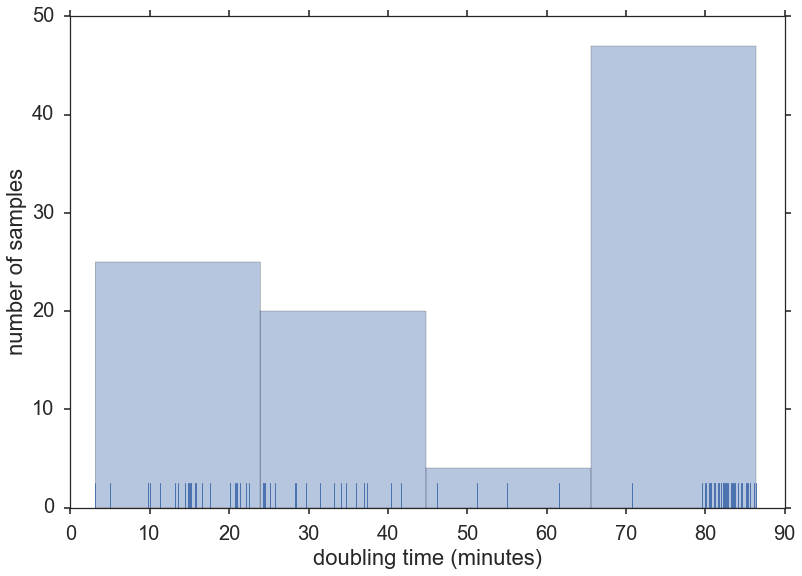

/Users/nmcollin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


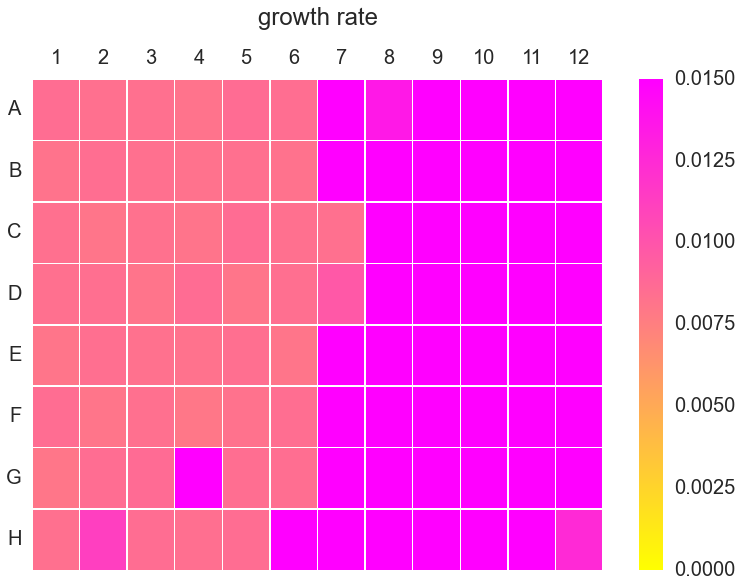

In [11]:
od.make_plots(spline_test, save=True)

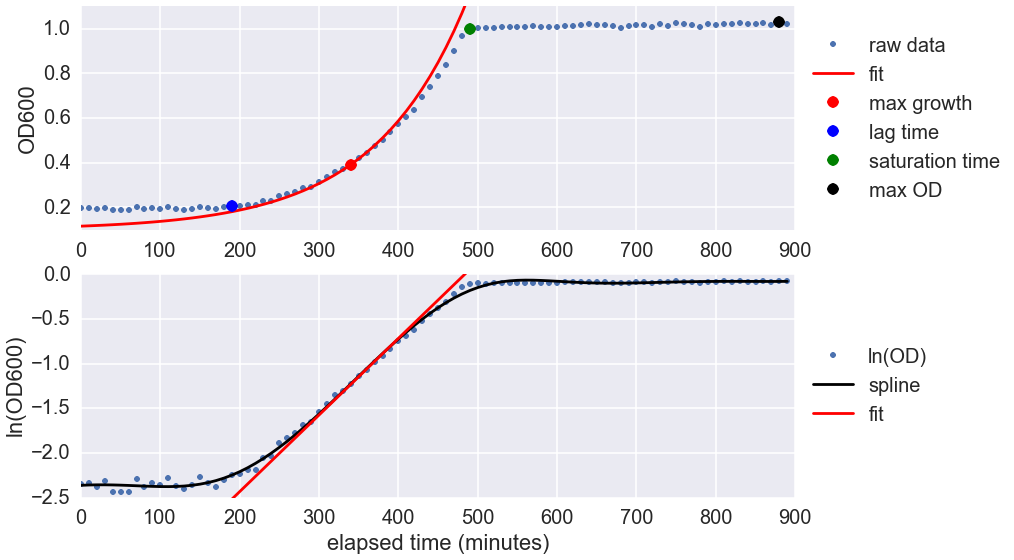

In [12]:
A1_spline = spline_test.samples['A1']
A1_spline.plot_growth_parameters(save=True)

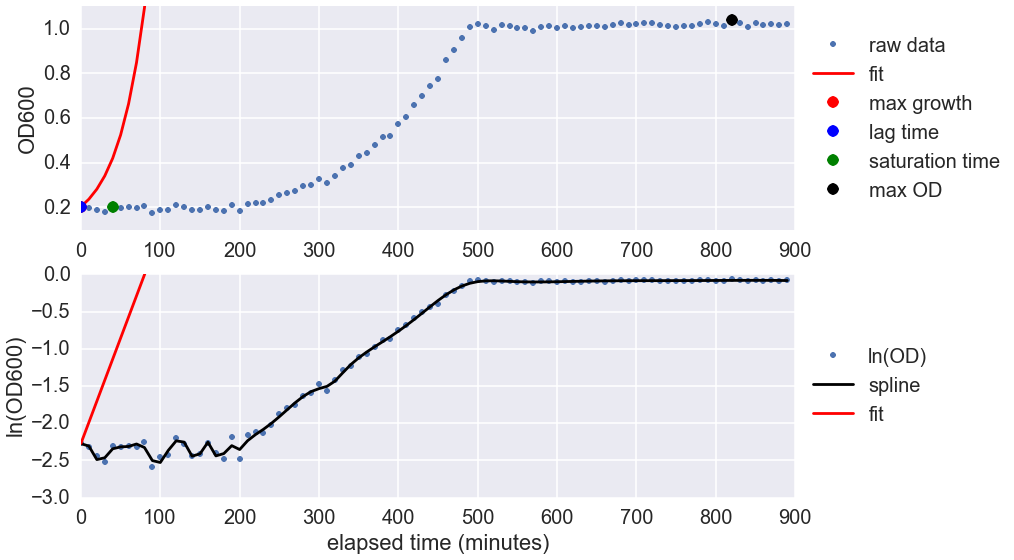

In [13]:
B7_spline = spline_test.samples['B7']
B7_spline.plot_growth_parameters(save=True)

In [14]:
spline_means = od.compute_means(spline_test, metric=['growth rate', 'lag time', 'saturation time'], keys=['noise'])

In [15]:
spline_means

growth rate           lag time            saturation time            
             mean       std     mean        std            mean         std
noise                                                                      
high     0.038492  0.034271   20.000  37.699822      103.750000  104.690019
low      0.009305  0.004225  156.875  62.199277      429.791667  114.175304

In [16]:
sliding_test = od.analyze_experiment('./test_data.xlsx', method='sliding_window', blank=0.1, out_dir = './')

created experiment
input samples
analyzed samples
created output data file


In [17]:
sliding_test.results['noise'] = np.where(sliding_test.results['column']>6, 'high', 'low')

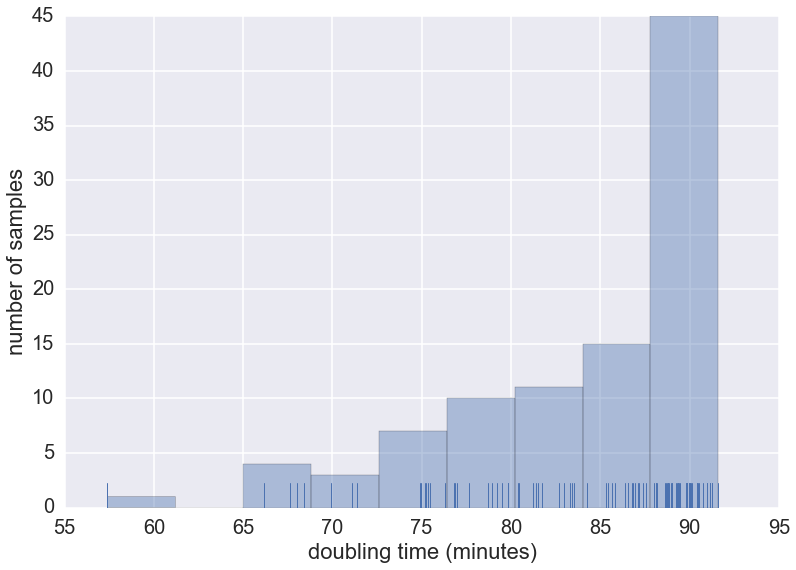

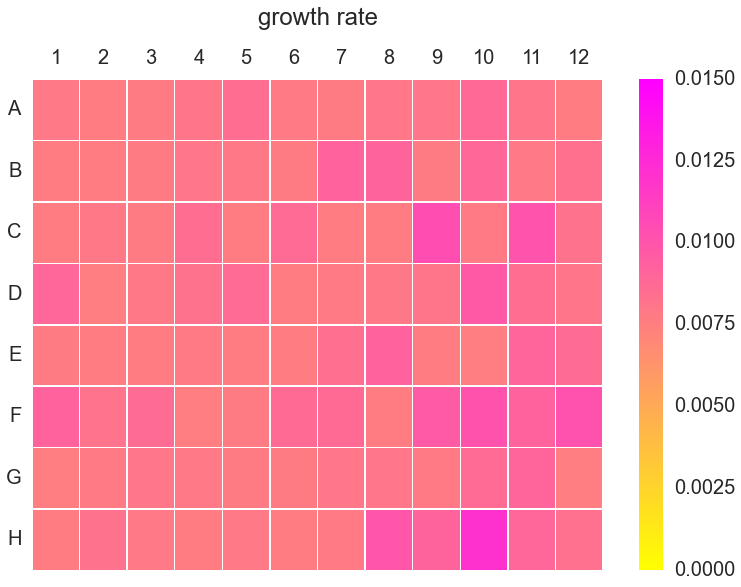

In [18]:
od.make_plots(sliding_test, save=True)

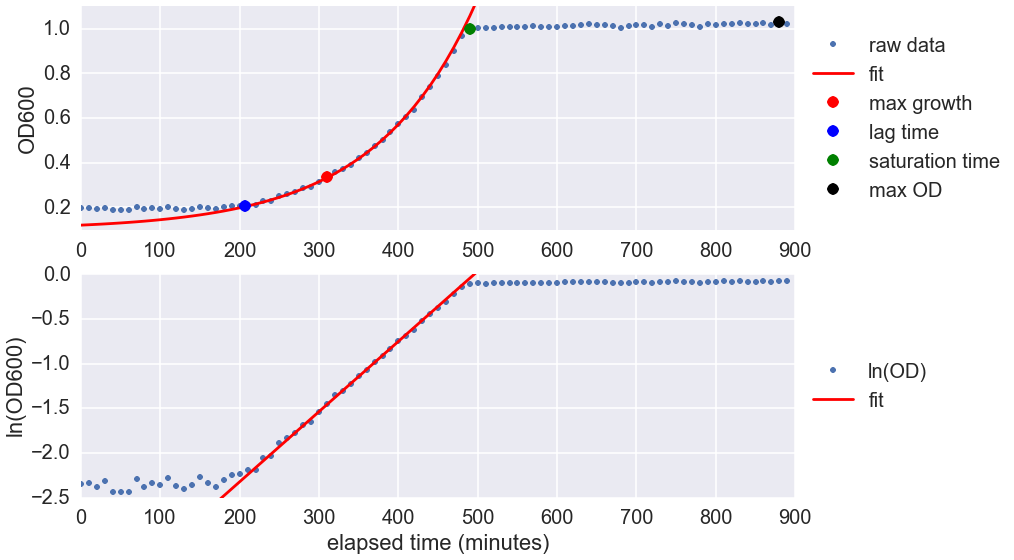

In [19]:
A1_slide = sliding_test.samples['A1']
A1_slide.plot_growth_parameters(save=True)

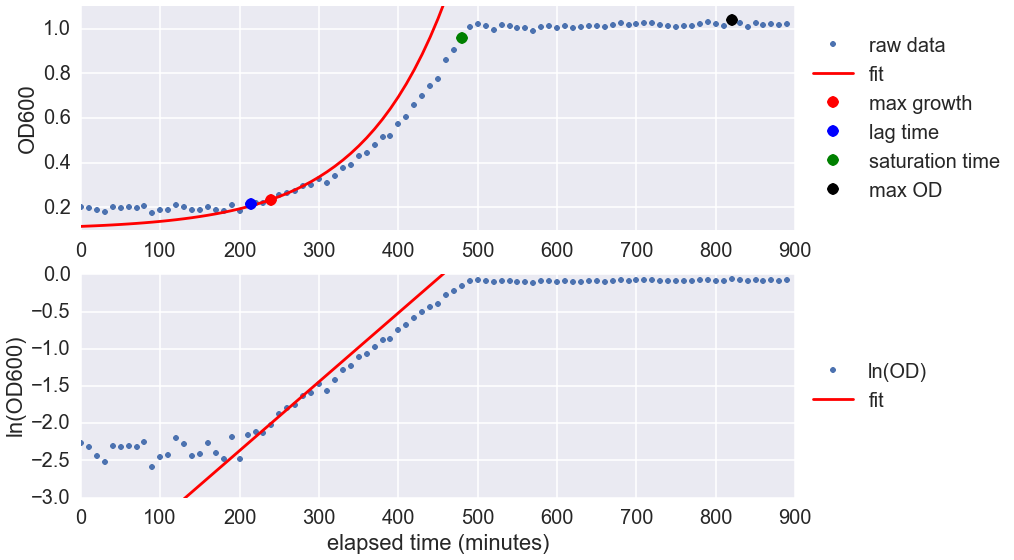

In [20]:
B7_slide = sliding_test.samples['B7']
B7_slide.plot_growth_parameters(save=True)

In [21]:
sliding_means = od.compute_means(sliding_test, metric=['growth rate', 'lag time', 'saturation time'], keys=['noise'])

In [22]:
sliding_means

growth rate              lag time           saturation time          
             mean       std        mean       std            mean       std
noise                                                                      
high     0.008626  0.000964  206.293768  8.812455      486.250000  5.309566
low      0.007969  0.000401  204.124456  4.805644      487.916667  4.104141

In [23]:
combo_test = od.analyze_experiment('./test_data.xlsx', blank=0.1, out_dir = './')

created experiment
input samples
analyzed samples
created output data file


In [24]:
combo_test.results['noise'] = np.where(combo_test.results['column']>6, 'high', 'low')

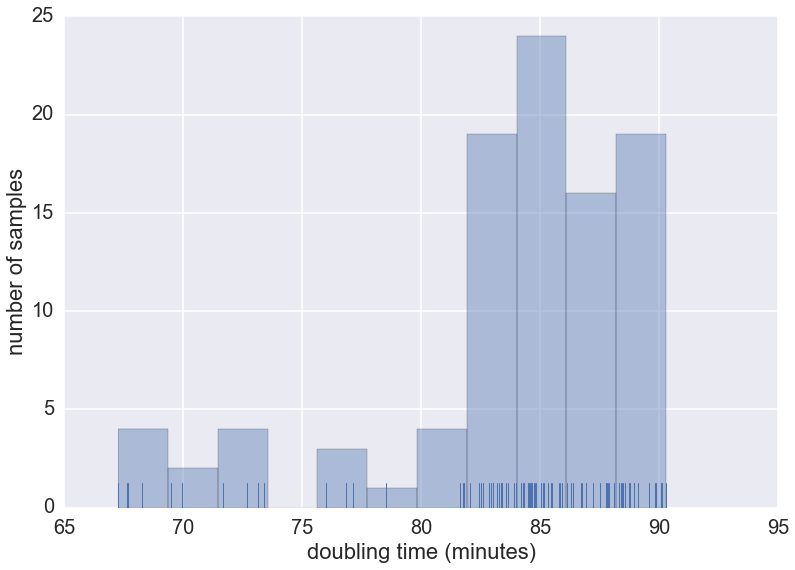

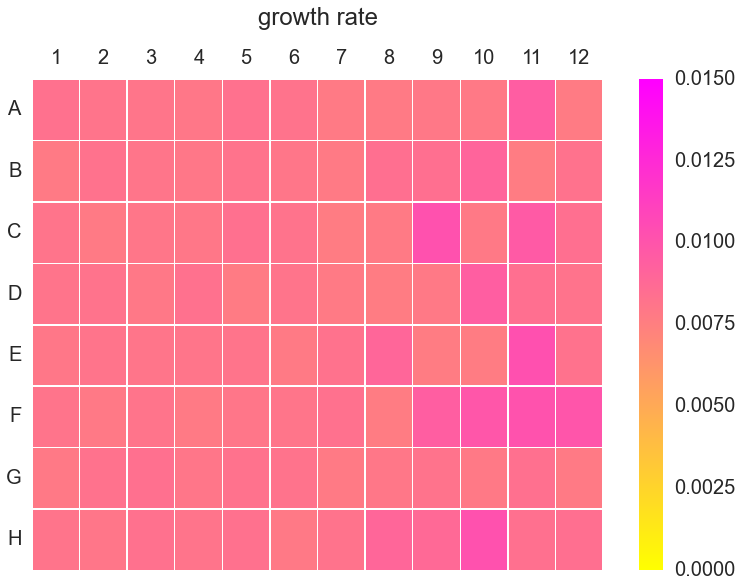

In [25]:
od.make_plots(combo_test, save=True)

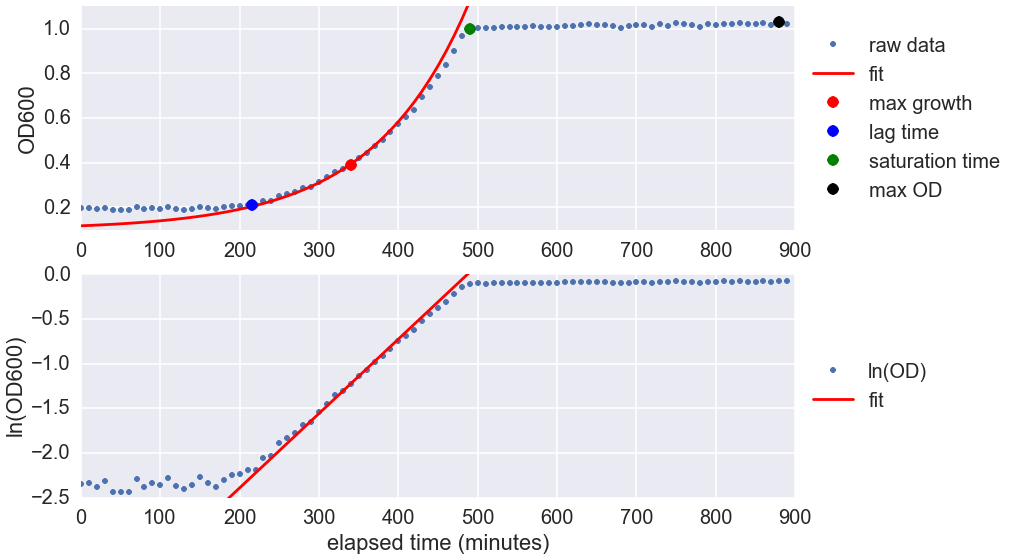

In [26]:
A1_combo = combo_test.samples['A1']
A1_combo.plot_growth_parameters(save=True)

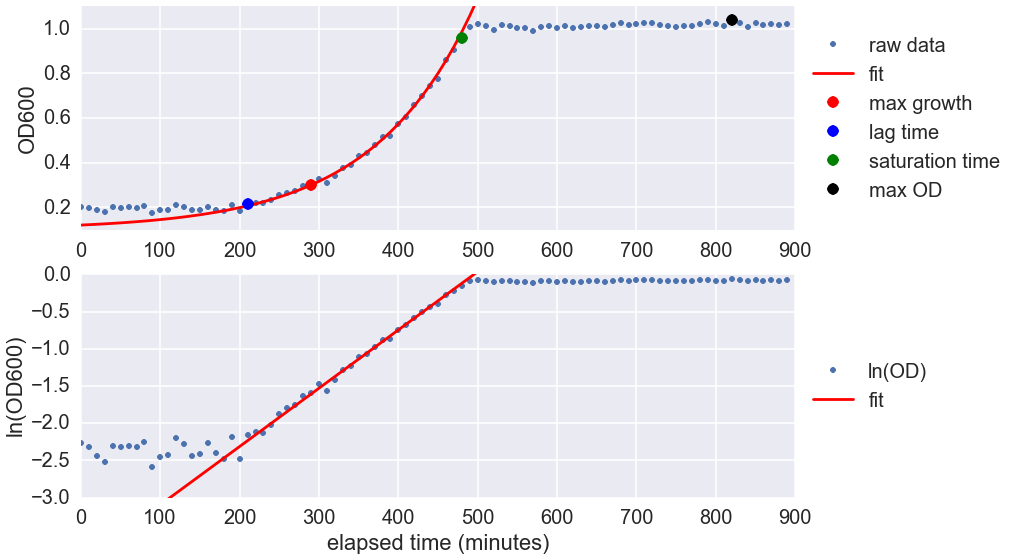

In [27]:
B7_combo = combo_test.samples['B7']
B7_combo.plot_growth_parameters(save=True)

In [28]:
combo_means = od.compute_means(combo_test, metric=['growth rate', 'lag time', 'saturation time'], keys=['noise'])

In [29]:
combo_means

growth rate              lag time            saturation time          
             mean       std        mean        std            mean       std
noise                                                                       
high     0.008504  0.000822  205.859885  10.061414      486.250000  5.309566
low      0.008126  0.000166  209.039507   5.213237      487.916667  4.104141

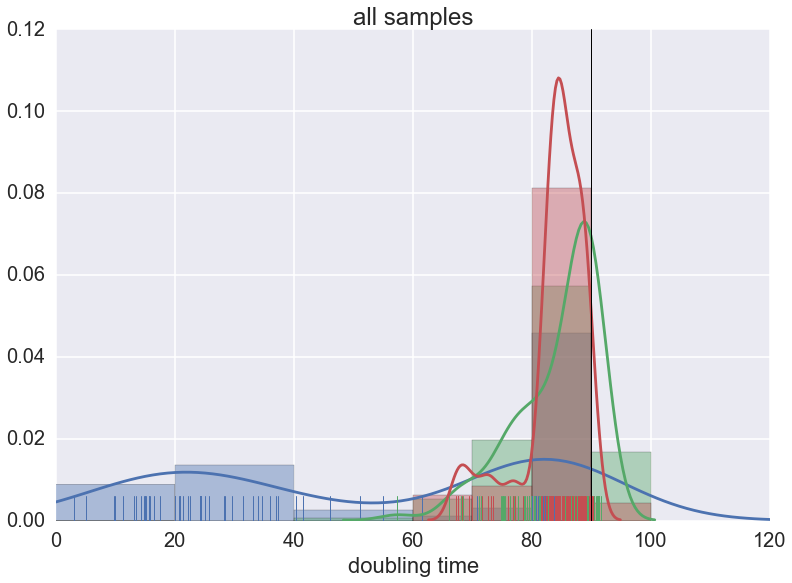

In [36]:
sns.distplot(spline_test.results['doubling time'].dropna(), kde=True, rug=True, bins=[0, 20, 40, 60, 70, 80, 90, 100], label='spline')
sns.distplot(sliding_test.results['doubling time'].dropna(), kde=True, rug=True, bins=[0, 20, 40, 60, 70, 80, 90, 100], label='sliding window')
sns.distplot(combo_test.results['doubling time'].dropna(), kde=True, rug=True, bins=[0, 20, 40, 60, 70, 80, 90, 100], label='combo')
plt.axvline(90, color='k', linewidth=1)
plt.xlim(0, 120)
plt.title('all samples')

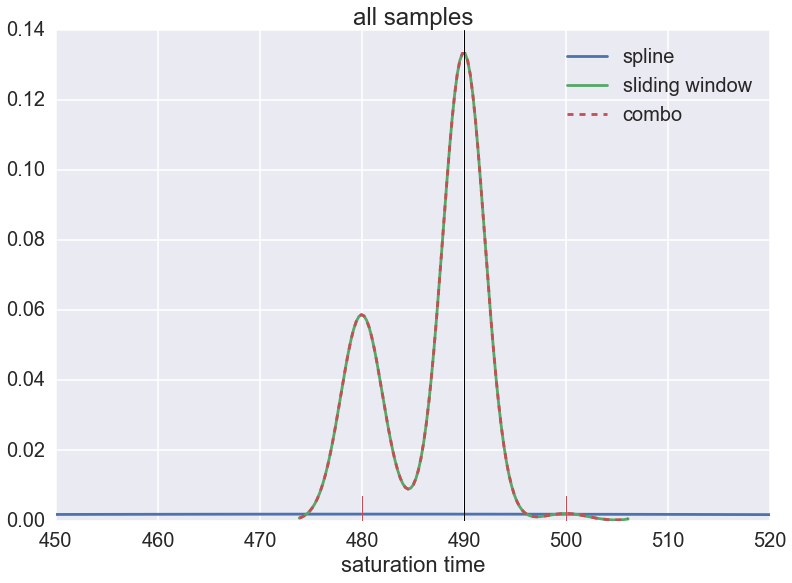

In [122]:
sns.set_context('poster', font_scale=1.25)
sns.set_style('darkgrid')
sns.distplot(spline_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='spline')
sns.distplot(sliding_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='sliding window')
sns.distplot(combo_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='combo', 
             kde_kws={'linestyle': '--'})
plt.axvline(490, color='k', linewidth=1)
plt.xlim(450, 520)
plt.title('all samples')
plt.savefig('./sat_all_samples_hist.png')

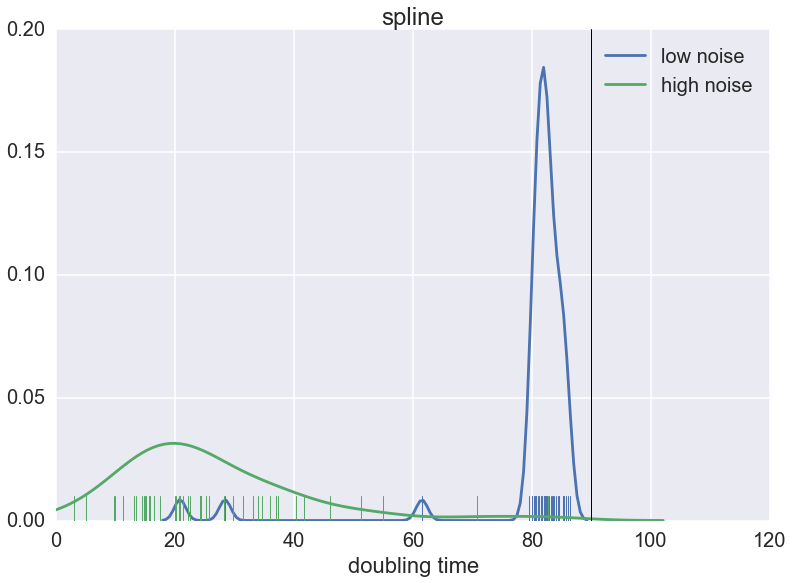

In [37]:
low_noise_spline_test = spline_test.results[spline_test.results['noise'] == 'low']
high_noise_spline_test = spline_test.results[spline_test.results['noise'] == 'high']
sns.distplot(low_noise_spline_test['doubling time'].dropna(), hist=False, kde=True, rug=True, label='low noise')
sns.distplot(high_noise_spline_test['doubling time'].dropna(), hist=False, kde=True, rug=True, label='high noise')
plt.axvline(90, color='k', linewidth=1)
plt.xlim(0, 120)
plt.title('spline')

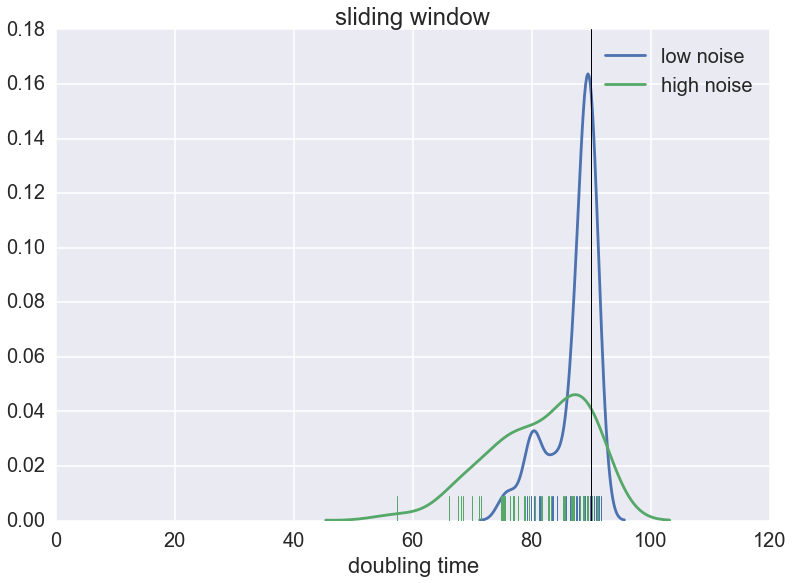

In [38]:
low_noise_sliding_test = sliding_test.results[sliding_test.results['noise'] == 'low']
high_noise_sliding_test = sliding_test.results[sliding_test.results['noise'] == 'high']
sns.distplot(low_noise_sliding_test['doubling time'].dropna(), hist=False, kde=True, rug=True, label='low noise')
sns.distplot(high_noise_sliding_test['doubling time'].dropna(), hist=False, kde=True, rug=True, label='high noise')
plt.axvline(90, color='k', linewidth=1)
plt.xlim(0, 120)
plt.title('sliding window')

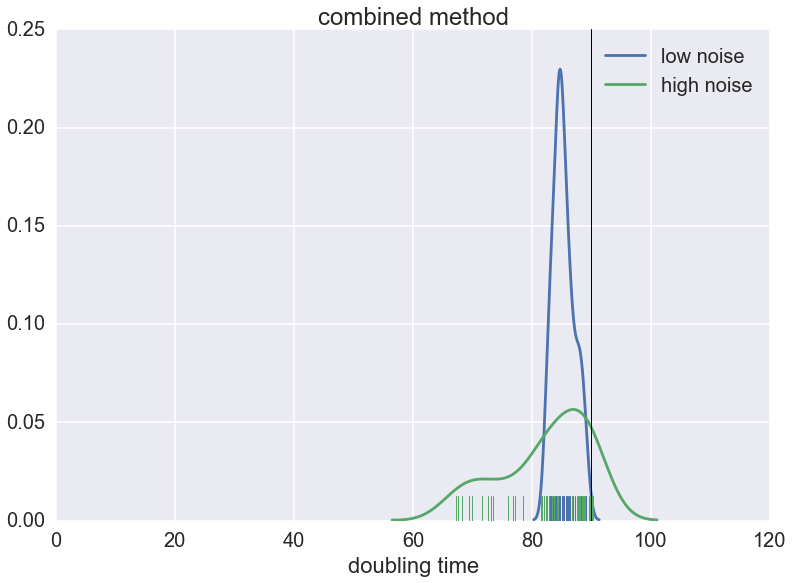

In [39]:
low_noise_combo = combo_test.results[combo_test.results['noise'] == 'low']
high_noise_combo = combo_test.results[combo_test.results['noise'] == 'high']
sns.distplot(low_noise_combo['doubling time'].dropna(), hist=False, kde=True, rug=True, label='low noise')
sns.distplot(high_noise_combo['doubling time'].dropna(), hist=False, kde=True, rug=True, label='high noise')
plt.axvline(90, color='k', linewidth=1)
plt.xlim(0, 120)
plt.title('combined method')

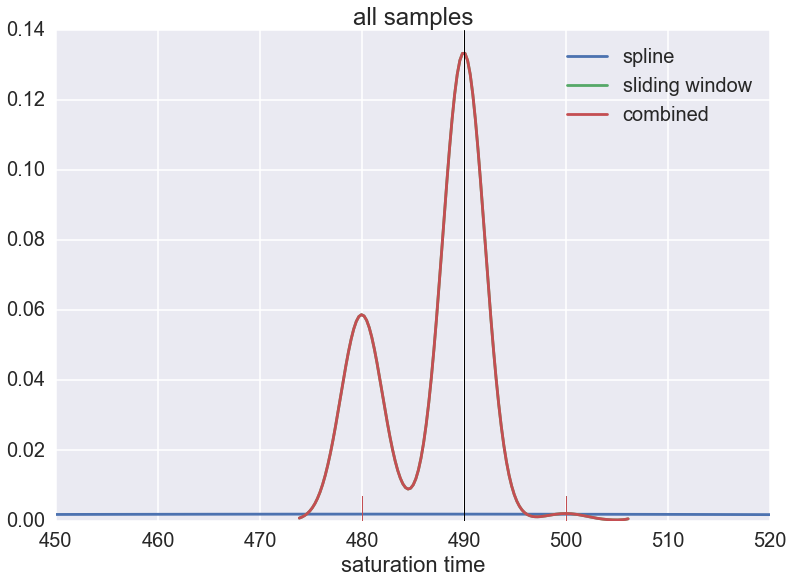

In [97]:
sns.distplot(spline_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='spline')
sns.distplot(sliding_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='sliding window')
sns.distplot(combo_test.results['saturation time'].dropna(), hist=False, kde=True, rug=True, label='combined')
plt.axvline(490, color='k', linewidth=1)
plt.xlim(450, 520)
plt.title('all samples')
#plt.savefig('./sat_all_samples_hist.png')

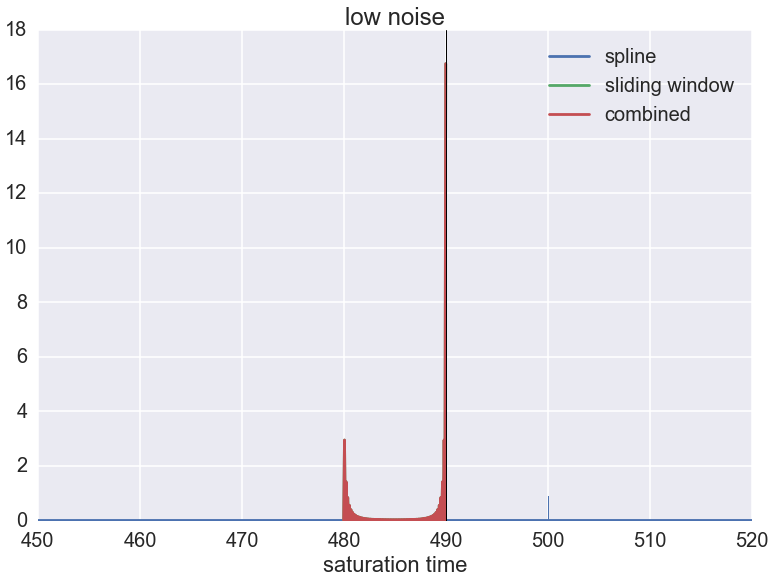

In [119]:
sns.set_style('darkgrid')
sns.distplot(low_noise_spline_test['saturation time'].dropna(), hist=False, kde=True, rug=True, label='spline')
sns.distplot(low_noise_sliding_test['saturation time'].dropna(), hist=False, kde=True, rug=True, label='sliding window')
sns.distplot(low_noise_combo['saturation time'].dropna(), hist=False, kde=True, rug=True, label='combined')
plt.axvline(490, color='k', linewidth=1)
plt.xlim(450, 520)
plt.title('low noise')
#plt.savefig('./sat_low_noise_hist.png')

In [123]:
all_methods_sat = pd.concat([spline_test.results['saturation time'], sliding_test.results['saturation time'], 
                            combo_test.results['saturation time']], axis=1)
all_methods_sat.columns = ['spline', 'sliding window', 'combined']

In [124]:
sat_low_noise = pd.concat([low_noise_spline_test['saturation time'], low_noise_sliding_test['saturation time'], 
                          low_noise_combo['saturation time']], axis=1)
sat_low_noise.columns = ['spline', 'sliding window', 'combined']
sat_high_noise = pd.concat([high_noise_spline_test['saturation time'], high_noise_sliding_test['saturation time'], 
                          high_noise_combo['saturation time']], axis=1)
sat_high_noise.columns = ['spline', 'sliding window', 'combined']

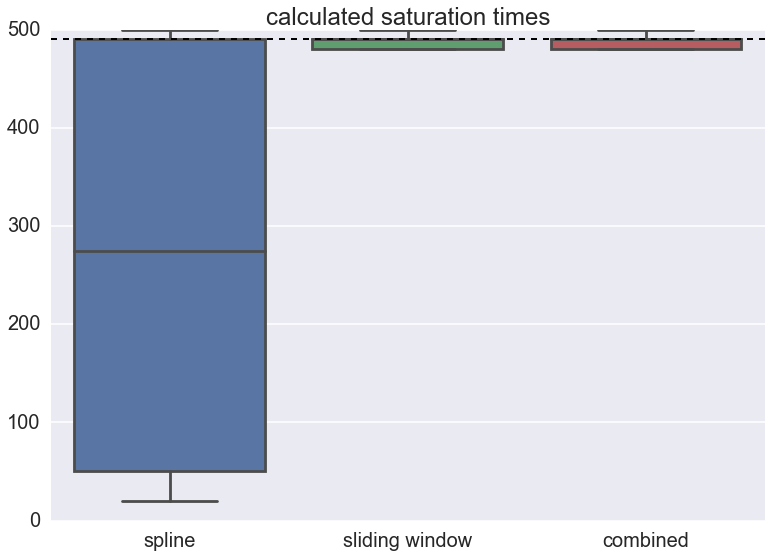

In [125]:
sns.boxplot(all_methods_sat)
plt.axhline(490, color='k', lw=2, ls='--')
plt.title('calculated saturation times')
plt.savefig('./sat_boxplot.png')

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster', font_scale = 1.25)
sns.set_style('darkgrid')

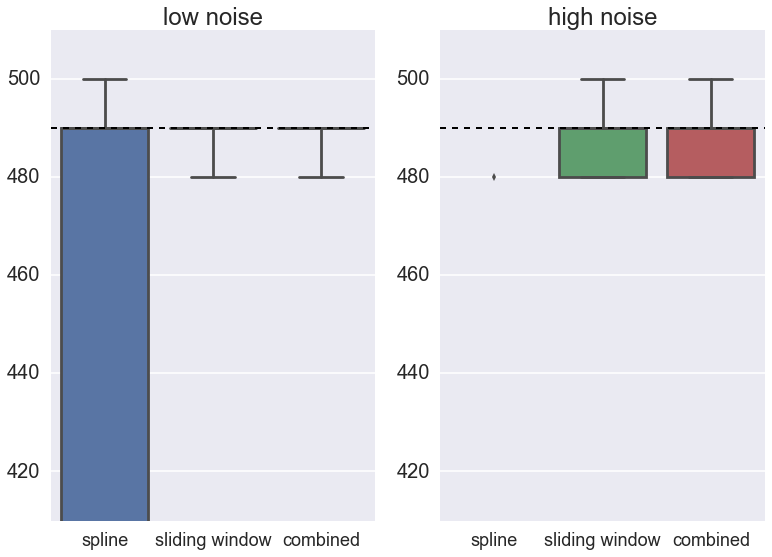

In [148]:
plt.subplot(121)
ax1 = sns.boxplot(sat_low_noise)
plt.axhline(490, color='k', lw=2, ls='--')
plt.ylim(410, 510)
plt.setp(ax1.get_xticklabels(), fontsize=18)
plt.title('low noise')
plt.subplot(122)
ax2 = sns.boxplot(sat_high_noise)
plt.axhline(490, color='k', lw=2, ls='--')
plt.ylim(410, 510)
plt.setp(ax2.get_xticklabels(), fontsize=18)
plt.title('high noise')
plt.savefig('./sat_low_high_boxplot.png')

now I want to test the effect of omitting a blank reading in the sliding window analysis

created experiment
input samples
analyzed samples
created output data file
